Text classification is the process of assigning categories or labels to text. In our case:
Input : SMS messages
Output : spam or ham
This is a binary classification problem.

Algorithms We’ll Use
1.Naive Bayes (especially Multinomial Naive Bayes)

. Great for text data.

. Assumes feature independence.

. Fast and performs well on smaller datasets.

2. Logistic Regression

. Also used for binary classification.

. Works well with high-dimensional sparse data (like text).


MultinomialNB is designed for word count features (like bag-of-words)

In [ ]:

import pandas as pd
import string
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ics\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.Series):
            return X.apply(self.clean_text)
        elif isinstance(X, list):
            return [self.clean_text(text) for text in X]
        else:
            raise ValueError("Input must be a pandas Series or list")

    def clean_text(self, text):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return " ".join(words)


In [19]:
# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Features and target
X = df['message']
y = df['label']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
pipeline = Pipeline([
    ('cleaner', TextCleaner()),
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])


In [22]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('cleaner', TextCleaner()), ('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [23]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.967713004484305

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[965   0]
 [ 36 114]]


In [24]:
joblib.dump(pipeline, 'spam_classifier_pipeline.pkl')
print("✅ Model saved as spam_classifier_pipeline.pkl")


✅ Model saved as spam_classifier_pipeline.pkl


In [25]:
# Load the model
model = joblib.load('spam_classifier_pipeline.pkl')

# Predict on a new message
print(model.predict(["Congratulations! You've won a free prize worth $1000."]))


[1]


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


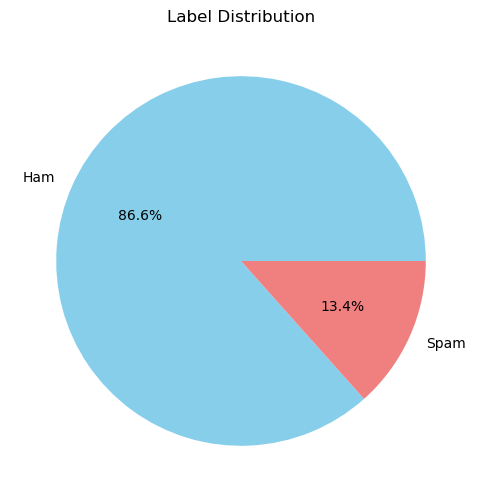

In [27]:
# Pie chart of label distribution
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot.pie(labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Label Distribution')
plt.ylabel('')
plt.show()


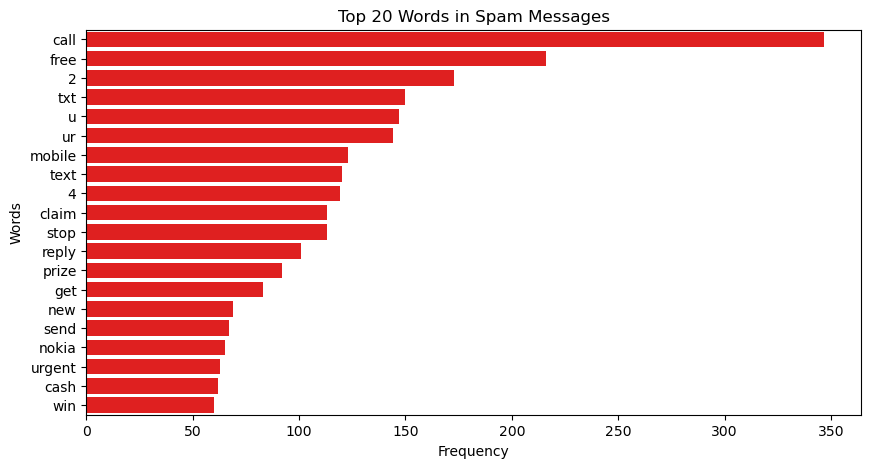

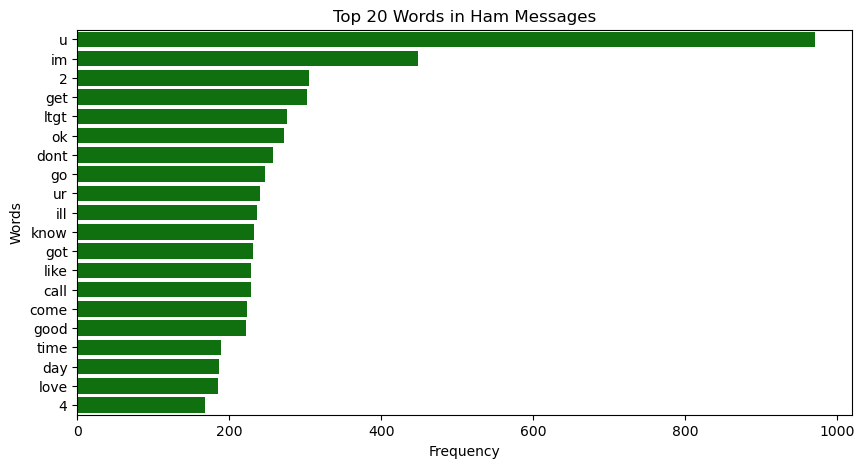

In [28]:
#most frequent words in spam and ham
def plot_top_words(label_name, color):
    messages = df[df['label'] == label_name]['message']
    all_words = ' '.join(messages).lower().translate(str.maketrans('', '', string.punctuation)).split()
    filtered_words = [word for word in all_words if word not in stop_words]
    word_freq = Counter(filtered_words).most_common(20)
    words, counts = zip(*word_freq)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), color=color)
    label = 'Spam' if label_name == 1 else 'Ham'
    plt.title(f'Top 20 Words in {label} Messages')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_words(1, 'red')   # Spam
plot_top_words(0, 'green') # Ham


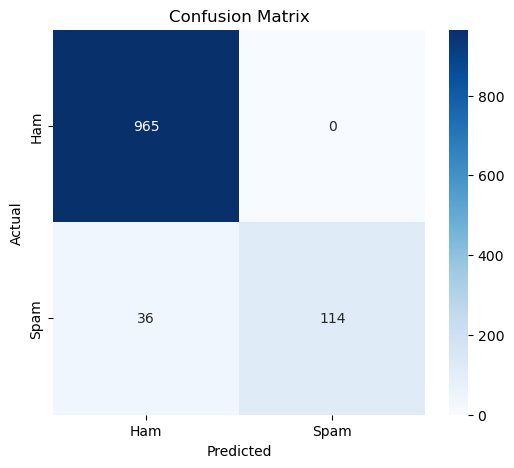

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

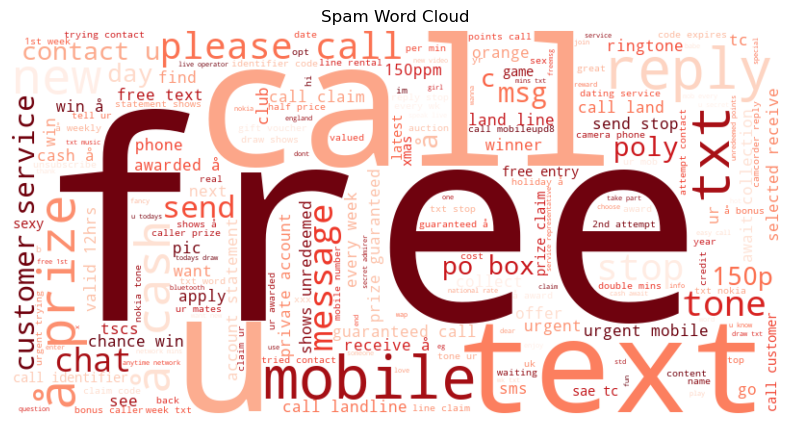

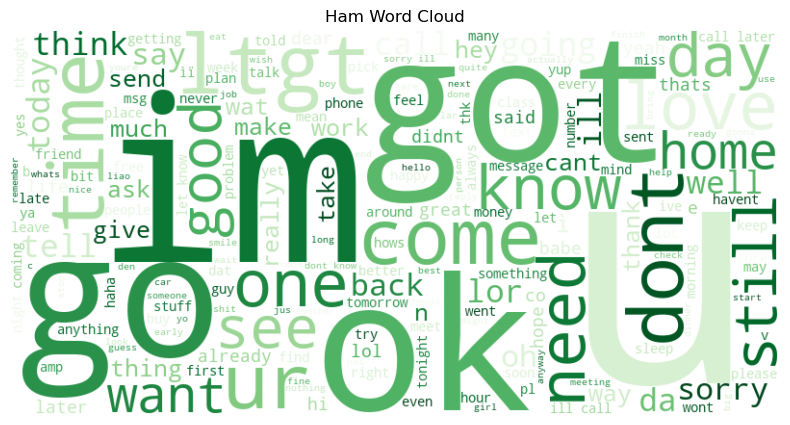

In [30]:
#word cloud of spam and ham
def show_wordcloud(label_name, colormap):
    messages = df[df['label'] == label_name]['message']
    text = ' '.join(messages).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    filtered_words = ' '.join([word for word in text.split() if word not in stop_words])
    
    wc = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(filtered_words)
    label = 'Spam' if label_name == 1 else 'Ham'
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{label} Word Cloud')
    plt.show()

show_wordcloud(1, 'Reds')   # Spam
show_wordcloud(0, 'Greens') # Ham
